<a href="https://colab.research.google.com/github/JENEEFATHOMAS/Feed-forward-Neural-Network-FNN-/blob/main/Feed_forward_neural_network_(FNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [ ]:
import numpy as np                                      #importing necessaty libraries
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.preprocessing.image import ImageDataGenerator

**Import dataset MNIST from keras**

In [ ]:
from keras.datasets import mnist                      #dataset

**Splitting Test and train set**

In [ ]:
(train_data,train_label),(test_data,test_label)=mnist.load_data()

**Plot**

In [ ]:
def plot_images_sample(X, Y):                                        #to plot test and train pixels
    # Draw plot for images sample 
    
    plt.figure(figsize=(10,10))
    rand_indicies = np.random.randint(len(X), size=25)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
        plt.xlabel(Y[index])
    plt.show()

***PLotting the training set***

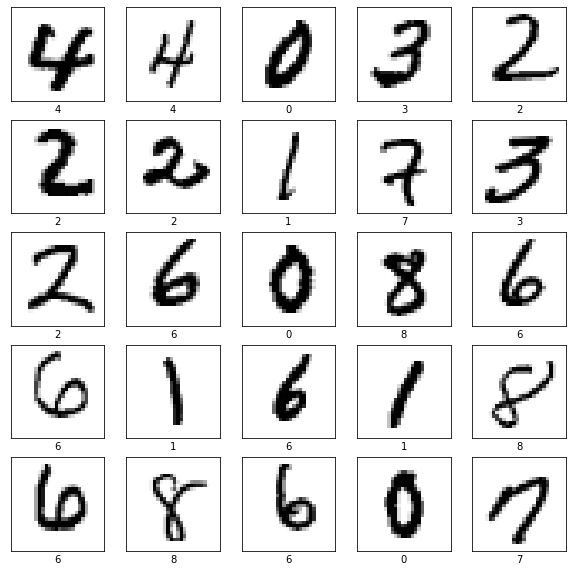

(60000, 28, 28)
(60000,)


In [ ]:
plot_images_sample(train_data,train_label)
print(train_data.shape)
print(train_label.shape)


**Plotting the test set**

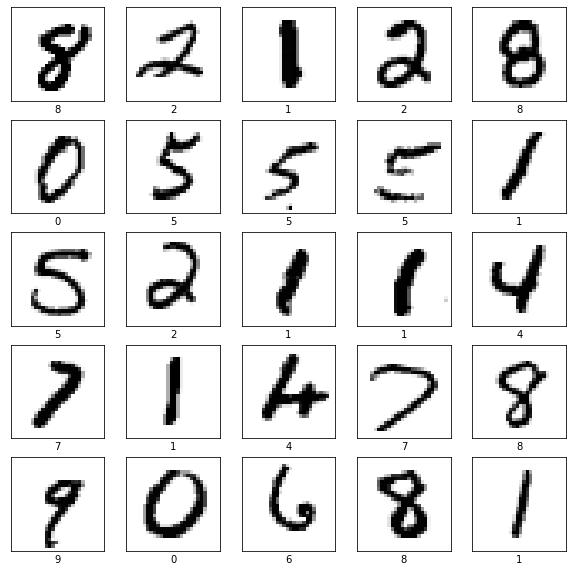

(10000, 28, 28)
(10000,)


In [ ]:
plot_images_sample(test_data,test_label)
print(test_data.shape)
print(test_label.shape)

**Building  Model**

In [ ]:
model=Sequential()                                  # sequential model allow us to add two or more layers

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

**Compiling Model**

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])     #adam optimizer control the learning rate , 
model.summary()                                                                           #castegorical_crossentropy  to evaluate loss function.

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
________________________________________________

In [ ]:
new_train_data=train_data/255
new_test_data=test_data/255

One hot encode label values

In [ ]:
new_train_label=np_utils.to_categorical(train_label)                   # changing train label
new_test_label=np_utils.to_categorical(test_label)
print(train_target[:10])
print(new_train_target[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


**FITTING MODEL**

In [ ]:
model.fit(new_train_data,new_train_label,epochs=20)                        #fitting our model

Epoch 1/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3716 - accuracy: 0.8866
Epoch 2/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0935 - accuracy: 0.9700
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0659 - accuracy: 0.9801
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0507 - accuracy: 0.9847
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0407 - accuracy: 0.9883
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0315 - accuracy: 0.9905
Epoch 7/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0272 - accuracy: 0.9923
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0259 - accuracy: 0.9916
Epoch 9/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0234 - accuracy: 0.9930
Epoch 10/20
1875/1875 [==============================] - 11s 6ms/step - l

**PLOTTING ACCURACY**

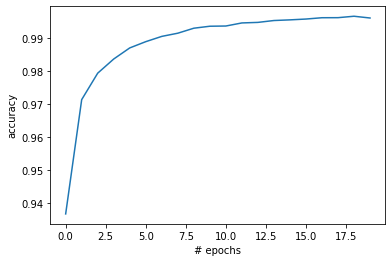

In [ ]:
plt.plot(model.history.history['accuracy'])                           #plotting the accuracy
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.show()

**EVALUATE MODEL**

In [ ]:
model.evaluate(new_test_data,new_test_label)

313/313 [==============================] - 2s 4ms/step - loss: 0.1227 - accuracy: 0.9808


[0.12272338569164276, 0.9807999730110168]

**PREDICTING MODEL**

In [ ]:
prediction = model.predict(new_test_data[:10])
print(prediction)

[[3.69655222e-21 2.89641949e-10 2.18677298e-11 1.49242063e-09
  1.00421245e-08 3.26939206e-16 2.86685274e-23 1.00000000e+00
  3.28547377e-14 3.16487531e-10]
 [2.02293244e-22 1.08074622e-23 1.00000000e+00 2.12241717e-23
  1.26106522e-22 1.10884763e-22 2.90506815e-28 2.66975325e-13
  3.89793686e-29 4.15597718e-33]
 [0.00000000e+00 1.00000000e+00 1.88463111e-22 3.40784657e-25
  7.21793844e-24 1.01955291e-21 5.89723748e-20 4.54599129e-19
  2.58425947e-17 2.87869158e-28]
 [1.00000000e+00 7.48515090e-21 2.15418627e-17 5.01489652e-20
  9.21319557e-18 1.45693506e-23 7.56047050e-16 3.28112591e-15
  3.34071340e-15 2.12734696e-14]
 [1.86427609e-12 4.84681684e-10 1.04507223e-12 1.72483031e-21
  1.00000000e+00 7.87238933e-16 9.27043205e-14 7.67179167e-11
  7.78804105e-15 5.04272135e-09]
 [0.00000000e+00 1.00000000e+00 1.42274476e-24 5.42140459e-27
  1.65749734e-25 1.43438010e-23 2.33302313e-21 1.05002113e-20
  1.34966521e-18 1.13101506e-30]
 [4.86520024e-09 4.82912128e-07 2.53385724e-06 3.46684465e

In [ ]:
p=np.argmax(prediction, axis=1)
print(p)
print(test_label[:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


**PRINT ORIGINAL AND PREDICTED DIGITS**

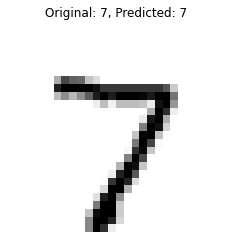

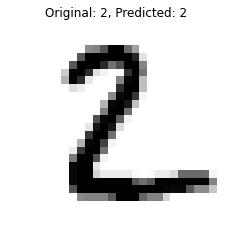

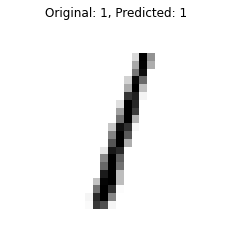

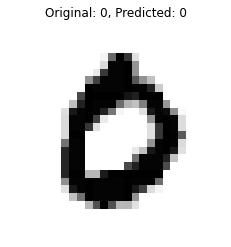

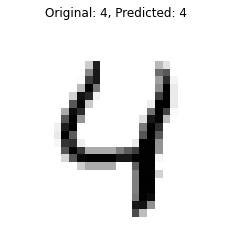

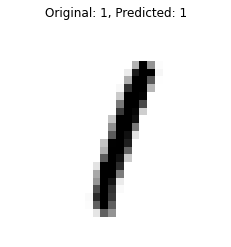

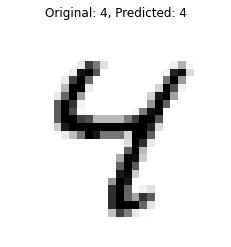

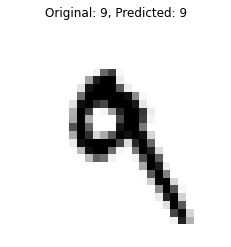

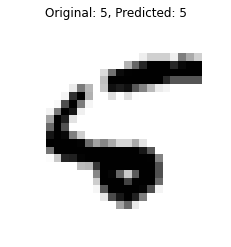

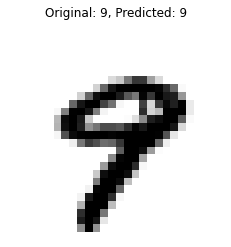

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(10):                                                          #comapring original and predicted result
  plt.imshow(new_test_data[i], cmap='binary')
  plt.title("Original: {}, Predicted: {}".format(test_label[i], p[i]))
  plt.axis("Off")
  plt.figure()